In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
%matplotlib inline
from collections import Counter
from collections import defaultdict
from sklearn import tree
import pickle

In [134]:
file = "./train"
data = pd.read_csv(file)

In [135]:
data

,id,unix_timestamp,ui_component_position,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,...,f0,f1,f2,f3,f4,f5,f6,f7,f8,click
0,10000679056417042096,1413849600,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,07d7df22,a99f214a,...,1005,18993,320,50,2161,0,35,NaN,157,0
1,10010730108771379386,1413849600,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,...,1005,20634,320,50,2374,3,39,NaN,23,0
2,10017325201002992404,1413849600,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,1005,15705,320,50,1722,0,35,NaN,79,1
3,10018897422996679694,1413849600,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,...,1005,20366,320,50,2333,0,39,NaN,157,0
4,10024660782388112342,1413849600,1,d9750ee7,98572c79,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,...,1005,17614,320,50,1993,2,1063,100083.0,33,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999994,9985626755387297314,1414710000,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,...,1005,17037,320,50,1934,2,39,NaN,16,0
1999995,9987260269049664739,1414710000,0,85f751fd,c4e18dd6,50e219e0,e2fcccd2,5c5a694b,0f2161f8,c7a43d7c,...,1005,20632,320,50,2374,3,39,NaN,23,0
1999996,9989166246566057980,1414710000,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,1005,22676,320,50,2616,0,35,NaN,51,0
1999997,9995700942528439110,1414710000,0,85f751fd,c4e18dd6,50e219e0,9c13b419,2347f47a,f95efa07,a99f214a,...,1005,23725,320,50,2716,3,47,100217.0,23,0


In [136]:
data.columns

Index(['id', 'unix_timestamp', 'ui_component_position', 'site_id',
       'site_domain', 'site_category', 'app_id', 'app_domain', 'app_category',
       'device_id', 'device_ip', 'device_model', 'device_type',
       'device_conn_type', 'f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7',
       'f8', 'click'],
      dtype='object')

In [137]:
data.dtypes

id                        uint64
unix_timestamp             int64
ui_component_position      int64
site_id                   object
site_domain               object
site_category             object
app_id                    object
app_domain                object
app_category              object
device_id                 object
device_ip                 object
device_model              object
device_type                int64
device_conn_type           int64
f0                         int64
f1                         int64
f2                         int64
f3                         int64
f4                         int64
f5                         int64
f6                         int64
f7                       float64
f8                         int64
click                      int64
dtype: object

### Checking class balance or imbalance for the target values

In [138]:
data["click"].value_counts()

0    1660242
1     339757
Name: click, dtype: int64

In [139]:
data['site_category'].value_counts()

50e219e0    819116
f028772b    625633
28905ebd    364460
3e814130    151054
f66779e6     12325
75fa27f6      8061
335d28a8      6739
76b2941d      5155
c0dd3be3      2006
72722551      1447
dedf689d      1238
70fb0e29      1151
0569f928       813
8fd0aea4       352
a818d37a       182
42a36e14       117
e787de0e        69
bcf865d9        39
5378d028        28
9ccfa2ea        12
74073276         2
Name: site_category, dtype: int64

In [140]:
data['site_domain'].value_counts()

c4e18dd6    748888
f3845767    320736
7e091613    164808
7687a86e     63959
98572c79     49383
             ...  
8df32dac         1
d848447b         1
61cd7291         1
b07a7798         1
88df5484         1
Name: site_domain, Length: 3486, dtype: int64

In [141]:
data["site_category"].value_counts()

50e219e0    819116
f028772b    625633
28905ebd    364460
3e814130    151054
f66779e6     12325
75fa27f6      8061
335d28a8      6739
76b2941d      5155
c0dd3be3      2006
72722551      1447
dedf689d      1238
70fb0e29      1151
0569f928       813
8fd0aea4       352
a818d37a       182
42a36e14       117
e787de0e        69
bcf865d9        39
5378d028        28
9ccfa2ea        12
74073276         2
Name: site_category, dtype: int64

In [142]:
data["app_id"].value_counts()

ecad2386    1277283
92f5800b      77181
e2fcccd2      56102
febd1138      37416
9c13b419      37292
             ...   
c702627e          1
b4d2cfa1          1
e937e647          1
9ed7c8e7          1
b62b1827          1
Name: app_id, Length: 3905, dtype: int64

In [143]:
data["app_domain"].value_counts()

7801e8d9    1346893
2347f47a     259372
ae637522      93280
5c5a694b      56108
82e27996      37418
             ...   
e4a3128e          1
e6cf1c39          1
f2140094          1
a7accd5b          1
a696f7de          1
Name: app_domain, Length: 252, dtype: int64

In [144]:
data["app_category"].value_counts()

07d7df22    1293980
0f2161f8     473552
cef3e649      85298
8ded1f7a      72748
f95efa07      56324
d1327cf5       6143
09481d60       2830
dc97ec06       2731
75d80bbe       1928
fc6fa53d       1177
4ce2e9fc       1076
879c24eb        676
a3c42688        542
4681bb9d        278
0f9a328c        267
a86a3e89        135
2281a340        106
8df2e842         96
79f0b860         32
0bfbc358         19
7113d72a         14
a7fd01ec         14
2fc4f2aa         11
18b1e0be         11
5326cf99          5
0d82db25          4
f395a87f          1
bf8ac856          1
Name: app_category, dtype: int64

In [145]:
data["device_model"].value_counts()

8a4875bd    121347
1f0bc64f     70211
d787e91b     69765
76dc4769     38249
be6db1d7     36425
             ...  
cb1d76e2         1
a7b2ed65         1
4f4cc405         1
9ab1415c         1
dd5aee98         1
Name: device_model, Length: 5755, dtype: int64

In [146]:
data["device_id"].value_counts()

a99f214a    1649314
0f7c61dc       1046
c357dbff       1003
936e92fb        673
afeffc18        498
             ...   
d2b18211          1
7c94d179          1
ef0578ed          1
ad2c9053          1
8e8d08ba          1
Name: device_id, Length: 279356, dtype: int64

In [147]:
data["device_ip"].value_counts()

6b9769f2    10336
431b3174     6662
2f323f36     4397
af9205f9     4322
af62faf4     4310
            ...  
deebcba1        1
c86c0141        1
1d793863        1
4ff2c252        1
79486d8c        1
Name: device_ip, Length: 963221, dtype: int64

In [148]:
data.describe()

,id,unix_timestamp,ui_component_position,device_type,device_conn_type,f0,f1,f2,f3,f4,f5,f6,f7,f8,click
count,1.999999e+06,1.999999e+06,1.999999e+06,1.999999e+06,1.999999e+06,1.999999e+06,1.999999e+06,1.999999e+06,1.999999e+06,1.999999e+06,1.999999e+06,1.999999e+06,1.062756e+06,1.999999e+06,1.999999e+06
mean,9.220606e+18,1.414276e+09,2.876976e-01,1.014939e+00,3.320797e-01,1.004967e+03,1.883260e+04,3.188733e+02,6.009756e+01,2.111678e+03,1.432941e+00,2.275286e+02,1.001125e+05,8.332048e+01,1.698786e-01
std,5.324011e+18,2.577985e+05,5.060088e-01,5.271822e-01,8.555685e-01,1.095353e+00,4.969209e+03,2.118907e+01,4.718247e+01,6.103768e+02,1.325602e+00,3.514350e+02,5.095875e+01,7.025905e+01,3.755262e-01
min,6.220845e+12,1.413850e+09,0.000000e+00,0.000000e+00,0.000000e+00,1.001000e+03,3.750000e+02,1.200000e+02,2.000000e+01,1.120000e+02,0.000000e+00,3.300000e+01,1.000000e+05,1.000000e+00,0.000000e+00
25%,4.606495e+18,1.414037e+09,0.000000e+00,1.000000e+00,0.000000e+00,1.005000e+03,1.692000e+04,3.200000e+02,5.000000e+01,1.863000e+03,0.000000e+00,3.500000e+01,1.000770e+05,2.300000e+01,0.000000e+00
50%,9.219336e+18,1.414289e+09,0.000000e+00,1.000000e+00,0.000000e+00,1.005000e+03,2.034600e+04,3.200000e+02,5.000000e+01,2.323000e+03,2.000000e+00,3.900000e+01,1.000840e+05,6.100000e+01,0.000000e+00
75%,1.383325e+19,1.414505e+09,1.000000e+00,1.000000e+00,0.000000e+00,1.005000e+03,2.189400e+04,3.200000e+02,5.000000e+01,2.526000e+03,3.000000e+00,1.710000e+02,1.001560e+05,1.010000e+02,0.000000e+00
max,1.844674e+19,1.414710e+09,7.000000e+00,5.000000e+00,5.000000e+00,1.012000e+03,2.405200e+04,1.024000e+03,1.024000e+03,2.758000e+03,3.000000e+00,1.839000e+03,1.002480e+05,2.550000e+02,1.000000e+00


In [149]:
d_device = pd.concat([data['device_type'], data["click"]],axis=1)

1    1844917
0     110406
4      38417
5       6258
2          1
Name: device_type, dtype: int64

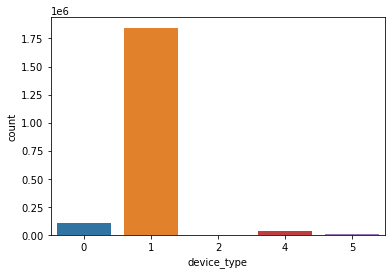

In [150]:
sns.countplot(x='device_type', data=d_device)
d_device.loc[:,'device_type'].value_counts()

In [151]:
device_type_table = pd.crosstab(data['device_type'], data["click"])
device_type_table

click,0,1
device_type,,
0,87049,23357
1,1532726,312191
2,1,0
4,34789,3628
5,5677,581


<AxesSubplot:xlabel='device_type'>

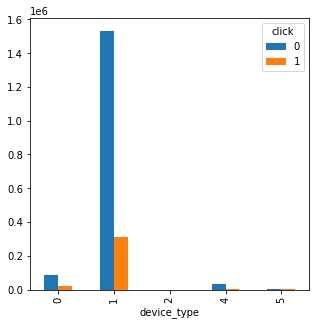

In [152]:
device_type_table.plot(kind='bar',figsize=(5,5),stacked=False)

<AxesSubplot:>

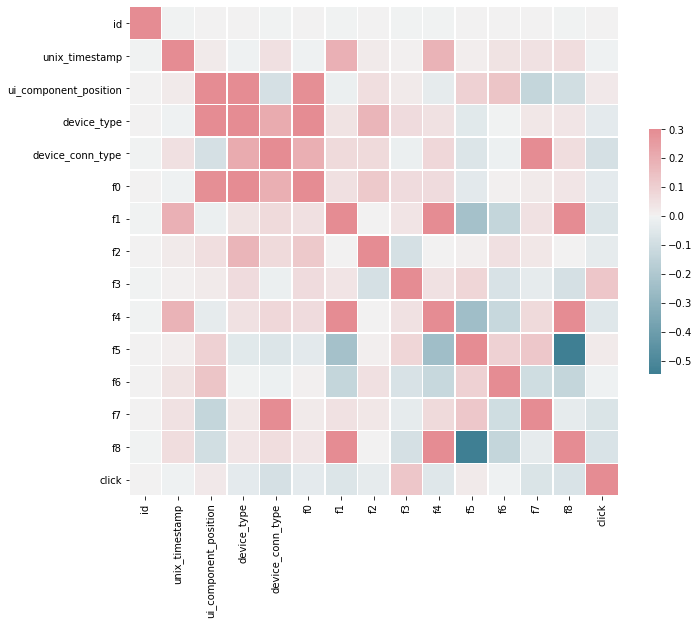

In [153]:
data_correlation = data.corr(method='pearson')
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data_correlation, cmap=cmap, vmax=0.3, center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.5})

In [154]:
data.isnull().sum().sort_values(ascending=False)

f7                       937243
id                            0
unix_timestamp                0
f8                            0
f6                            0
f5                            0
f4                            0
f3                            0
f2                            0
f1                            0
f0                            0
device_conn_type              0
device_type                   0
device_model                  0
device_ip                     0
device_id                     0
app_category                  0
app_domain                    0
app_id                        0
site_category                 0
site_domain                   0
site_id                       0
ui_component_position         0
click                         0
dtype: int64

### Drop duplicates and Null entries

In [155]:
print(data.shape)
data = data.drop_duplicates(keep = 'first')
data.shape

(1999999, 24)


(1999999, 24)

In [156]:
# Removing null etries
data.dropna()
data.shape

(1999999, 24)

In [157]:
# Function to map categorical variables (dtypes objects) into numerical representation
def map_function(column):
    map_dictionary = defaultdict(int)
    for i, j in enumerate(data[column].unique()):
        map_dictionary[j]=i+1
    return(map_dictionary)

In [158]:
data["device_model"]=data["device_model"].map(map_function("device_model"))
data["site_domain"]=data["site_domain"].map(map_function("site_domain"))
data["app_id"]=data["app_id"].map(map_function("app_id"))
data["app_domain"]=data["app_domain"].map(map_function("app_domain"))
data["app_category"]=data["app_category"].map(map_function("app_category"))

data

,id,unix_timestamp,ui_component_position,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,...,f0,f1,f2,f3,f4,f5,f6,f7,f8,click
0,10000679056417042096,1413849600,1,fe8cc448,1,0569f928,1,1,1,a99f214a,...,1005,18993,320,50,2161,0,35,NaN,157,0
1,10010730108771379386,1413849600,1,e151e245,2,f028772b,1,1,1,a99f214a,...,1005,20634,320,50,2374,3,39,NaN,23,0
2,10017325201002992404,1413849600,0,1fbe01fe,3,28905ebd,1,1,1,a99f214a,...,1005,15705,320,50,1722,0,35,NaN,79,1
3,10018897422996679694,1413849600,1,e151e245,2,f028772b,1,1,1,a99f214a,...,1005,20366,320,50,2333,0,39,NaN,157,0
4,10024660782388112342,1413849600,1,d9750ee7,4,f028772b,1,1,1,a99f214a,...,1005,17614,320,50,1993,2,1063,100083.0,33,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999994,9985626755387297314,1414710000,1,e151e245,2,f028772b,1,1,1,a99f214a,...,1005,17037,320,50,1934,2,39,NaN,16,0
1999995,9987260269049664739,1414710000,0,85f751fd,7,50e219e0,5,4,3,c7a43d7c,...,1005,20632,320,50,2374,3,39,NaN,23,0
1999996,9989166246566057980,1414710000,0,1fbe01fe,3,28905ebd,1,1,1,a99f214a,...,1005,22676,320,50,2616,0,35,NaN,51,0
1999997,9995700942528439110,1414710000,0,85f751fd,7,50e219e0,65,2,2,a99f214a,...,1005,23725,320,50,2716,3,47,100217.0,23,0


In [159]:
data["app_domain"].value_counts()

1      1346893
2       259372
13       93280
4        56108
5        37418
        ...   
174          1
171          1
165          1
164          1
252          1
Name: app_domain, Length: 252, dtype: int64

In [160]:
# Droping the id, site_id, site_category, device_id columns since they contain categorical variables with too many categories.
# Using pd.get_dummies to categorize them will require more computation power and will also create too many columns.

data = data.dropna()
X = data[['ui_component_position', 'device_type','device_model','site_domain',"app_id","app_domain", "app_category",
       'device_conn_type', 'f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7']]
y = data.click.values

print(X)

         ui_component_position  device_type  device_model  site_domain  \
4                            1            1             5            4   
5                            0            1             6            3   
6                            0            0             7            5   
13                           0            1            14            7   
14                           0            0            15            7   
...                        ...          ...           ...          ...   
1999988                      0            1            81            3   
1999991                      0            1            47           14   
1999993                      0            1            87            3   
1999997                      0            1           301            7   
1999998                      1            1          1360            7   

         app_id  app_domain  app_category  device_conn_type    f0     f1   f2  \
4             1           1   

### Apply random oversampling to balance classes

In [161]:
#!pip install imblearn

In [162]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Oversampling the under representated class by bringing the ratio of classes to 1:2

print(Counter(y))

oversample = RandomOverSampler(sampling_strategy=0.5)
#undersample = RandomUnderSampler(sampling_strategy='majority')
X_over, y_over = oversample.fit_resample(X, y)
print(Counter(y_over))

Counter({0: 904128, 1: 158628})
Counter({0: 904128, 1: 452064})


### Train Test Data Preparation

In [163]:
import sklearn.model_selection

# Split data into 80% training and 20% testing

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X_over, y_over, test_size=0.2, random_state=5)

In [164]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1084953, 16)
(1084953,)
(271239, 16)
(271239,)


In [165]:
### Normalizing only the x_train data to prevent data leakage
#x_train = preprocessing.normalize(x_train)

### Decision Tree Classifier

In [166]:
### We will first use the simple decision tree classifier model to model the data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report

In [167]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [168]:
y_predict = dtc.predict(x_test)

In [169]:
# Use the accuracy to measure the performance of the model
accuracy_score(y_test, y_predict)


0.7734322866549427

The accuracy score is about 77%, which is a good score. However the accuracy metric is not a good measure for the model performance, since there is class imbalance. The model can be bias and mostly predict the over represented class and the accuracy score of the model will still be high. A good metric to measure the performance of the model in this instance is the AUC (Area under the Curve) metric and also the AUC-ROC (Area Under the ROC Curve). A good classifier model should have an AUC-score which is close to 1, and bad classifier model which randomly classifies (poor classifier) should have an AUC-score close to 0.5. Also the confusion matrix and f1-score are good metrics to use, since they can both show you how well the model is able to predict the under represented class. An f1-score close to 1 also indicates a good classifier model, this shows that the model is able to fairly balance the prediction of both the binary classes (under represented and over represented classes)

### AUC (Area Under the Curve) 

In [170]:
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predict)
auc_1 = auc(false_positive_rate, true_positive_rate)
print("Area Under the Curve",auc_1)

Area Under the Curve 0.7410309912714917


In [171]:
y_prob = dtc.predict_proba(x_test)[:,1]
roc_auc_score_1 = roc_auc_score(y_test, y_prob)
print("Area Under the ROC-Curve", roc_auc_score_1)

Area Under the ROC-Curve 0.8445939893032378


### Confusion Matrix


In [172]:
pd.DataFrame(
   confusion_matrix(y_test, y_predict),
   columns = ['Predicted not clicked', "predicted_clicked"],
   index = ['Actual not clicked', "Actual clicked"]
)

,Predicted not clicked,predicted_clicked
Actual not clicked,151585,29264
Actual clicked,32190,58200


### Classification Report

In [173]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83    180849
           1       0.67      0.64      0.65     90390

    accuracy                           0.77    271239
   macro avg       0.75      0.74      0.74    271239
weighted avg       0.77      0.77      0.77    271239



### Decision Tree Classifier Model Visualization and Architecture Description

In [ ]:
tree.plot_tree(dtc)
plt.show()

### Hyperparameter Tuning with Grid Search

In [174]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

#A decision tree model is just one tree.
#Max-depth represent the depth of a single tree.
#Criterion represents the functions that can be used to measure the quality of the leaf splits.

parameters = {'max_depth':[5,6,7,8,9, 10,11,12,13,14,15, 20, 50, 100, None], 
              "criterion":["gini", "entropy"]}

dtc = DecisionTreeClassifier()
grid_search = GridSearchCV(dtc, parameters)
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                       20, 50, 100, None]})

In [175]:
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': None}


In [176]:
decision_tree_best = grid_search.best_estimator_

y_predict = decision_tree_best.predict(x_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predict)

grid_auc_socre = auc(false_positive_rate, true_positive_rate)
print("Area Under Curve  Score:",grid_auc_socre)

Area Under Curve  Score: 0.7409314079617432


In [177]:
y_predict_proba = decision_tree_best.predict_proba(x_test)[:,1]
grid_auc = roc_auc_score(y_test, y_predict_proba)
print("Area Under ROC Curve:",grid_auc)

Area Under ROC Curve: 0.8445321293813605


In [178]:
print("Accuracy:",accuracy_score(y_test, y_predict))

Accuracy: 0.7733917320149388


In [179]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83    180849
           1       0.67      0.64      0.65     90390

    accuracy                           0.77    271239
   macro avg       0.75      0.74      0.74    271239
weighted avg       0.77      0.77      0.77    271239



### Decision Tree Classifier Model Visualization and Architecture Description

In [ ]:
tree.plot_tree(decision_tree_best)
plt.show()

### Text Model Structure

In [ ]:
text_model_architecture = tree.export_text(decision_tree_best)
print(text_model_architecture)

### Random Forest

In [180]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=1)
rfc.fit(x_train,y_train)

RandomForestClassifier(random_state=1)

In [181]:
y_predict = rfc.predict(x_test)
print("accuracy_score",accuracy_score(y_test, y_predict))

accuracy_score 0.7822916321030531


### AUC (Area Under the Curve)

In [182]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predict)
rfc_roc_auc = auc(false_positive_rate, true_positive_rate)
print("AUC-score",rfc_roc_auc)


AUC-score 0.7514790712119963


In [186]:
y_predict_proba = rfc.predict_proba(x_test)[:,1]
rfc_auc_1 = roc_auc_score(y_test, y_predict_proba)
print("Area Under ROC Curve:",rfc_auc_1)

Area Under ROC Curve: 0.8553290328088788


### Confusion Matrix

In [183]:
pd.DataFrame(
   confusion_matrix(y_test, y_predict),
   columns = ['Predicted not clicked', "predicted_clicked"],
   index = ['Actual not clicked', "Actual clicked"]
)

,Predicted not clicked,predicted_clicked
Actual not clicked,152613,28236
Actual clicked,30815,59575


### Classification Report

In [184]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84    180849
           1       0.68      0.66      0.67     90390

    accuracy                           0.78    271239
   macro avg       0.76      0.75      0.75    271239
weighted avg       0.78      0.78      0.78    271239



### Hyperparameter Tuning

In [132]:
# n_estimators represent the number of trees in a model or forest
# max-depth is the depth allowed on each tree
# min_samples_split represent the minimum number of splits allowed in a single leaf or node
# min_samples_leaf represents the minimum number of samples allowed on each leaf or node

n_estimators = [100, 300, 500, 800, 1000]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

parameters = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

rfc = RandomForestClassifier()
grid_search = GridSearchCV(rfc, parameters, cv = 2, verbose = 1, 
                      n_jobs = -1)
grid_search.fit(x_train, y_train)

Fitting 2 folds for each of 500 candidates, totalling 1000 fits


KeyboardInterrupt: 

In [ ]:
print(grid_search.best_params_)

In [ ]:
random_forest_best = grid_search.best_estimator_

y_predict = random_forest_best.predict(x_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predict)

rfc_auc_roc = auc(false_positive_rate, true_positive_rate)
print(rfc_auc_roc)

In [ ]:
y_predict_proba = random_forest.predict_proba(x_test)[:,1]
grid_auc = roc_auc_score(y_test, y_predict_proba)
print(grid_auc)

In [ ]:
print(accuracy_score(y_test, y_predict))

In [ ]:
print(classification_report(y_test, y_predict))

In [ ]:
#!pip install hyperopt

# Hyperparameter Tuning with Bayesian Optimization

### Bayesian optimization in Decision Tree Classifier

In [50]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score



def objective_function(params):
    X_ = x_train[:]
    
    if 'scale' in params:
        if params['scale'] == 1:
            X_ = preprocessing.scale(X_)
            del params['scale']
    model = DecisionTreeClassifier(**params)
    return(cross_val_score(model, X_, y_train).mean())

#parameter search space for decision tree classifier
space_for_dtc = {'max_depth': hp.choice('max_depth', range(1,20)),
    'max_features': hp.choice('max_features', range(1,5)),
    'criterion': hp.choice('criterion', ["gini", "entropy"]),
#    'scale': hp.choice('scale', [0, 1]),
#    'normalize': hp.choice('normalize', [0, 1])
}

def f(params):
    global best
    
#    clf = DecisionTreeClassifier(*params)
#    acc = cross_val_score(clf, x_train, y_train).mean()
    acc = objective_function(params)
    if acc > best:
        best = acc
    return({'loss': -acc, 'status': STATUS_OK})

best = 0
trials = Trials()
best = fmin(f, space_for_dtc, algo=tpe.suggest, max_evals=100, trials=trials)
print('best:', best)

100%|██████████| 100/100 [07:28<00:00,  4.49s/trial, best loss: -0.7203823571412449]
best: {'criterion': 1, 'max_depth': 18, 'max_features': 2}


In [51]:
print(best)

{'criterion': 1, 'max_depth': 18, 'max_features': 2}


In [55]:
#Fitting the model using best parameters
best_dtr = DecisionTreeClassifier(max_depth=int(best['max_depth']), 
                                  criterion='entropy', 
                                  max_features=int(best["max_features"]))

best_dtr.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=18, max_features=2)

In [57]:
y_predict = best_dtr.predict(x_test)
print("accuracy-score", accuracy_score(y_test, y_predict))

accuracy-score 0.7171276991878012


In [58]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predict)
dtr_auc_4 = auc(false_positive_rate, true_positive_rate)
print("Area Under the Curve", dtr_auc_4)

Area Under the Curve 0.6360807120140166


In [59]:
y_prob = best_dtr.predict_proba(x_test)[:,1]
dtr_roc_auc_score_4 = roc_auc_score(y_test, y_prob)
print("Area Under the ROC-Curve", dtr_roc_auc_score_4)

Area Under the ROC-Curve 0.7596878228430836


In [60]:
pd.DataFrame(
   confusion_matrix(y_test, y_predict),
   columns = ['Predicted not clicked', "predicted_clicked"],
   index = ['Actual not clicked', "Actual clicked"]
)

,Predicted not clicked,predicted_clicked
Actual not clicked,158984,21865
Actual clicked,54861,35529


In [61]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.74      0.88      0.81    180849
           1       0.62      0.39      0.48     90390

    accuracy                           0.72    271239
   macro avg       0.68      0.64      0.64    271239
weighted avg       0.70      0.72      0.70    271239



From the results obtained above, the best performing model based on the calculated metric scores (AUC, AUC-ROC and f1-scores) is the random forest classifier model. The hyperparameter tuning or the the gridSearch has not been performed on the random forest classifier since the model ran forever when the GridSearch is implemented. The best performing model can now be saved using pickle.

### (Pickle) Save or Load any of the models above

In [ ]:
## Save the random forest classifier model
filename = 'random_forest.sav'
pickle.dump(rfc, open(filename, 'wb'))

In [ ]:
rfc_model = pickle.load(open(filename, 'rb'))

In [ ]:
class_mapping = {0: 'No click', 1: 'Click'}

def classify(a, b, c, d, e, f, g, h, i, j, k, l, m, n, o, p):
    arr = np.array([a, b, c, d, e, f, g, h, i, j, k, l, m, n, o, p]) # Convert to numpy array
    arr = arr.astype(np.float64) # Change the data type to float
    query = arr.reshape(1, -1) # Reshape the array
    prediction = class_mapping[rfc_model.predict(query)[0]] # Retrieve from dictionary
    return prediction # Return the prediction